In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('../../data/kyoto.csv', header=None, index_col=0)

In [22]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1.00,3.638,3.607,3.625,3.585,3.635,3.576,2.395,2.375,2.380,2.389,2.392,2.386
0.50,3.067,3.049,3.093,3.125,3.018,3.092,1.738,1.736,1.755,1.752,1.754,1.749
0.25,3.697,3.730,3.730,3.683,3.733,3.733,1.275,1.304,1.282,1.304,1.286,1.292
0.12,5.150,5.092,5.189,5.167,5.010,5.115,0.945,0.944,0.957,0.956,0.966,0.977
0.06,5.290,5.333,5.395,5.431,5.389,5.350,0.742,0.724,0.761,0.736,0.731,0.733
0.03,4.877,4.945,4.865,4.880,4.884,4.888,0.604,0.584,0.598,0.596,0.593,0.590
0.01,4.334,4.252,4.225,4.245,4.318,4.265,0.516,0.520,0.523,0.507,0.504,0.527
0.00,3.622,3.506,3.458,3.604,3.514,3.539,0.457,0.462,0.448,0.459,0.455,0.446


In [154]:
mmap = [1,2,3,4,5, 6]
snapshot = [7, 8, 9, 10, 11, 12]

df_mean = pd.DataFrame()
df_mean['mmap()'] = df[mmap].mean(axis=1)
df_mean['snapshot()'] = df[snapshot].mean(axis=1)
df_mean_orig = df_mean.copy(deep=True)
df_mean.index = ["%.0f" % val for val in 1/df_mean.index]

In [171]:
df_mean_orig

,mmap(),snapshot()
0,,
1.00,3.611000,2.386167
0.50,3.074000,1.747333
0.25,3.717667,1.290500
0.12,5.120500,0.957500
0.06,5.364667,0.737833
0.03,4.889833,0.594167
0.01,4.273167,0.516167
0.00,3.540500,0.454500


In [175]:
df_e_max = pd.DataFrame()
df_e_max['mmap()'] = df[mmap].max(axis=1)
df_e_max['snapshot()'] = df[snapshot].max(axis=1)
df_e_max = df_e_max.T - df_mean_orig.T

df_e_max

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
mmap(),0.027000,0.051000,0.015333,0.0685,0.066333,0.055167,0.060833,0.0815
snapshot(),0.008833,0.007667,0.013500,0.0195,0.023167,0.009833,0.010833,0.0075


In [176]:
df_e_min = pd.DataFrame()
df_e_min['mmap()'] = df[mmap].min(axis=1)
df_e_min['snapshot()'] = df[snapshot].min(axis=1)
df_e_min = df_e_min.T - df_mean_orig.T
df_e_min

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
mmap(),-0.035000,-0.056000,-0.034667,-0.1105,-0.074667,-0.024833,-0.048167,-0.0825
snapshot(),-0.011167,-0.011333,-0.015500,-0.0135,-0.013833,-0.010167,-0.012167,-0.0085


In [177]:
yerr_mmap = pd.DataFrame()
yerr_mmap = pd.DataFrame([df_e_min.T['mmap()'], df_e_max.T['mmap()']])
yerr_mmap

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
mmap(),-0.035,-0.056,-0.034667,-0.1105,-0.074667,-0.024833,-0.048167,-0.0825
mmap(),0.027,0.051,0.015333,0.0685,0.066333,0.055167,0.060833,0.0815


In [178]:
yerr_snap = pd.DataFrame()
yerr_snap = pd.DataFrame([df_e_min.T['snapshot()'], df_e_max.T['snapshot()']])
yerr_snap

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
snapshot(),-0.011167,-0.011333,-0.0155,-0.0135,-0.013833,-0.010167,-0.012167,-0.0085
snapshot(),0.008833,0.007667,0.0135,0.0195,0.023167,0.009833,0.010833,0.0075


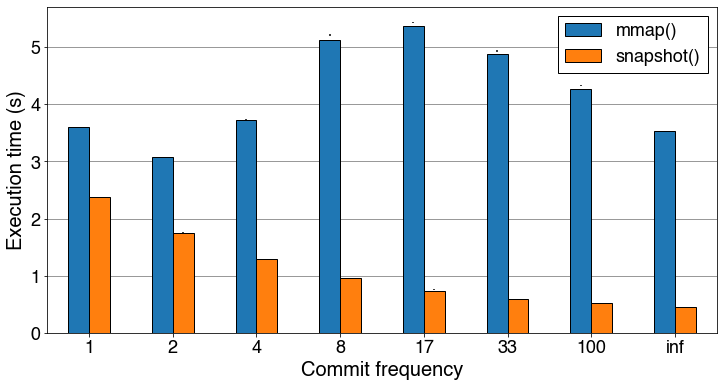

In [211]:
fontsize=18
figsize=(12, 6)
ax = df_mean.plot.bar(figsize=figsize, fontsize=fontsize, yerr = [yerr_mmap, yerr_snap], zorder=3,edgecolor='black')
ax.grid(axis='y', zorder=0, color='gray')
ax.set_xlabel("Commit frequency", fontsize=fontsize+2)
ax.set_ylabel("Execution time (s)", fontsize=fontsize+2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# print(ax.())
_=ax.legend(fontsize=fontsize, fancybox=False,edgecolor='black',facecolor='white',framealpha=1)